In [19]:
# import libraries
import requests
import pandas as pd
import re
import matplotlib.pyplot as plt

In [34]:
my_symbol = 'IBM'
my_key = open('key').read()
base_url = 'https://www.alphavantage.co/query'
parameters = {'function':'TIME_SERIES_DAILY', 'symbol':my_symbol, 'apikey':my_key}

res = requests.get(base_url,params=parameters)

In [9]:
res

<Response [200]>

In [10]:
res.text

'{\n    "Meta Data": {\n        "1. Information": "Daily Prices (open, high, low, close) and Volumes",\n        "2. Symbol": "IBM",\n        "3. Last Refreshed": "2024-04-10",\n        "4. Output Size": "Compact",\n        "5. Time Zone": "US/Eastern"\n    },\n    "Time Series (Daily)": {\n        "2024-04-10": {\n            "1. open": "187.4200",\n            "2. high": "187.9150",\n            "3. low": "185.5200",\n            "4. close": "186.0400",\n            "5. volume": "3081915"\n        },\n        "2024-04-09": {\n            "1. open": "190.5400",\n            "2. high": "191.2500",\n            "3. low": "186.6600",\n            "4. close": "189.3100",\n            "5. volume": "2790673"\n        },\n        "2024-04-08": {\n            "1. open": "189.2400",\n            "2. high": "190.2400",\n            "3. low": "188.9118",\n            "4. close": "189.8200",\n            "5. volume": "2673611"\n        },\n        "2024-04-05": {\n            "1. open": "188.5900"

In [11]:
res.headers

{'Date': 'Thu, 11 Apr 2024 13:53:13 GMT', 'Content-Type': 'application/json', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Report-To': '{"group":"heroku-nel","max_age":3600,"endpoints":[{"url":"https://nel.heroku.com/reports?ts=1712843593&sid=1b10b0ff-8a76-4548-befa-353fc6c6c045&s=b2HDT9sLj7rLXvrmib94vooSoQHZ2dU0o9t%2FxU959MQ%3D"}]}', 'Reporting-Endpoints': 'heroku-nel=https://nel.heroku.com/reports?ts=1712843593&sid=1b10b0ff-8a76-4548-befa-353fc6c6c045&s=b2HDT9sLj7rLXvrmib94vooSoQHZ2dU0o9t%2FxU959MQ%3D', 'Nel': '{"report_to":"heroku-nel","max_age":3600,"success_fraction":0.005,"failure_fraction":0.05,"response_headers":["Via"]}', 'Allow': 'GET, HEAD, OPTIONS', 'X-Frame-Options': 'DENY', 'Vary': 'Cookie, Origin', 'X-Content-Type-Options': 'nosniff', 'Referrer-Policy': 'same-origin', 'Cross-Origin-Opener-Policy': 'same-origin', 'Via': '1.1 vegur', 'CF-Cache-Status': 'DYNAMIC', 'Server': 'cloudflare', 'CF-RAY': '872b762cfc196214-ORD', 'Content-Encoding': 'gzip'}

In [12]:
res.json()

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
  '2. Symbol': 'IBM',
  '3. Last Refreshed': '2024-04-10',
  '4. Output Size': 'Compact',
  '5. Time Zone': 'US/Eastern'},
 'Time Series (Daily)': {'2024-04-10': {'1. open': '187.4200',
   '2. high': '187.9150',
   '3. low': '185.5200',
   '4. close': '186.0400',
   '5. volume': '3081915'},
  '2024-04-09': {'1. open': '190.5400',
   '2. high': '191.2500',
   '3. low': '186.6600',
   '4. close': '189.3100',
   '5. volume': '2790673'},
  '2024-04-08': {'1. open': '189.2400',
   '2. high': '190.2400',
   '3. low': '188.9118',
   '4. close': '189.8200',
   '5. volume': '2673611'},
  '2024-04-05': {'1. open': '188.5900',
   '2. high': '190.3200',
   '3. low': '188.0200',
   '4. close': '189.1400',
   '5. volume': '2012428'},
  '2024-04-04': {'1. open': '192.0000',
   '2. high': '193.2800',
   '3. low': '187.3400',
   '4. close': '187.9400',
   '5. volume': '2924438'},
  '2024-04-03': {'1. open': '188.6000'

In [13]:
res.json()['Time Series (Daily)']

{'2024-04-10': {'1. open': '187.4200',
  '2. high': '187.9150',
  '3. low': '185.5200',
  '4. close': '186.0400',
  '5. volume': '3081915'},
 '2024-04-09': {'1. open': '190.5400',
  '2. high': '191.2500',
  '3. low': '186.6600',
  '4. close': '189.3100',
  '5. volume': '2790673'},
 '2024-04-08': {'1. open': '189.2400',
  '2. high': '190.2400',
  '3. low': '188.9118',
  '4. close': '189.8200',
  '5. volume': '2673611'},
 '2024-04-05': {'1. open': '188.5900',
  '2. high': '190.3200',
  '3. low': '188.0200',
  '4. close': '189.1400',
  '5. volume': '2012428'},
 '2024-04-04': {'1. open': '192.0000',
  '2. high': '193.2800',
  '3. low': '187.3400',
  '4. close': '187.9400',
  '5. volume': '2924438'},
 '2024-04-03': {'1. open': '188.6000',
  '2. high': '191.3500',
  '3. low': '188.4850',
  '4. close': '190.9000',
  '5. volume': '2818910'},
 '2024-04-02': {'1. open': '189.1400',
  '2. high': '189.8000',
  '3. low': '187.6000',
  '4. close': '188.8800',
  '5. volume': '2689711'},
 '2024-04-01'

In [35]:
df = pd.DataFrame.from_records(res.json()['Time Series (Daily)'])
df.head()

,2023-11-15,2023-11-16,2023-11-17,2023-11-20,2023-11-21,2023-11-22,2023-11-24,2023-11-27,2023-11-28,2023-11-29,...,2024-03-27,2024-03-28,2024-04-01,2024-04-02,2024-04-03,2024-04-04,2024-04-05,2024-04-08,2024-04-09,2024-04-10
1. open,150.4000,153.0000,153.2900,152.5100,154.6000,154.5000,155.1300,154.9900,155.4400,156.1500,...,189.6000,190.9400,190.0000,189.1400,188.6000,192.0000,188.5900,189.2400,190.5400,187.4200
2. high,153.2200,153.3500,153.5000,154.6800,154.6600,155.7050,155.4000,156.1350,155.7450,157.5100,...,190.9600,191.9299,190.4600,189.8000,191.3500,193.2800,190.3200,190.2400,191.2500,187.9150
3. low,150.4000,152.1300,152.4601,152.3500,153.5100,154.1600,153.9200,154.7500,154.8600,156.0200,...,188.6000,190.3400,188.5200,187.6000,188.4850,187.3400,188.0200,188.9118,186.6600,185.5200
4. close,152.5800,153.0600,152.8900,154.3500,153.9100,155.1300,155.1800,155.5700,155.6500,156.4100,...,190.8000,190.9600,189.8300,188.8800,190.9000,187.9400,189.1400,189.8200,189.3100,186.0400
5. volume,4632519,3519172,4426676,3658936,2859508,3045091,1799161,4053093,2666182,3568887,...,3693305,3742169,2362586,2689711,2818910,2924438,2012428,2673611,2790673,3081915


In [17]:
df = pd.DataFrame.from_records(res.json()['Time Series (Daily)']).T
df.head()

,1. open,2. high,3. low,4. close,5. volume
2023-11-15,150.4000,153.2200,150.4000,152.5800,4632519
2023-11-16,153.0000,153.3500,152.1300,153.0600,3519172
2023-11-17,153.2900,153.5000,152.4601,152.8900,4426676
2023-11-20,152.5100,154.6800,152.3500,154.3500,3658936
2023-11-21,154.6000,154.6600,153.5100,153.9100,2859508


In [20]:
# rename the columns by removing the leading number
# c = []
# for col in df.columns:
    
#     c.append(re.sub('\d\.\s', '',col))

# df.rename(names = lambda x: re.sub('\d\.\s', '',x) for x in df.columns )
df = df.rename(columns=lambda x: x.split('. ')[1])

In [26]:
df.columns
df.head()
df.describe()
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 2023-11-15 to 2024-04-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   open    100 non-null    object
 1   high    100 non-null    object
 2   low     100 non-null    object
 3   close   100 non-null    object
 4   volume  100 non-null    object
dtypes: object(5)
memory usage: 4.7+ KB


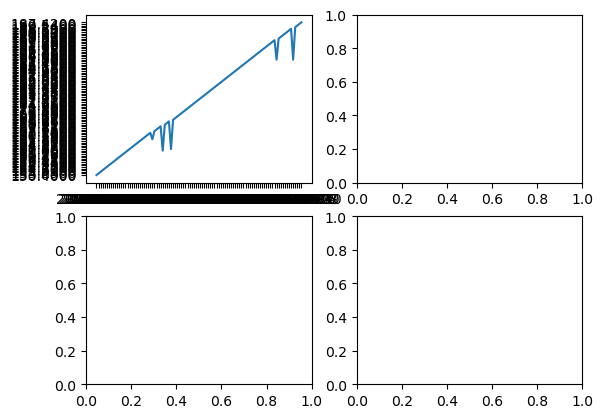

In [24]:
# plot the values
fig, axs = plt.subplots(2,2)

axs[0][0].plot(df['open'])

In [28]:
# plot above is wrong because the values are strings (objects)
# convert to numeric
for col in df.columns:
    df[col] = pd.to_numeric(df[col])

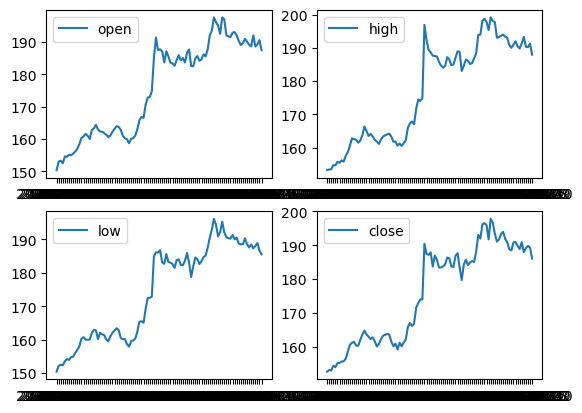

In [32]:
# plot the values
fig, axs = plt.subplots(2,2)
for i in range(2):
    for j in range(2):
        idx =i*2+j
        lab = df.columns[idx]
        axs[i][j].plot(df.iloc[:,idx], label = lab)
        axs[i][j].legend()
        print()

In [31]:
df.columns[0]

'open'

In [ ]:
df['open'] == df.iloc[:,0] # equivalent

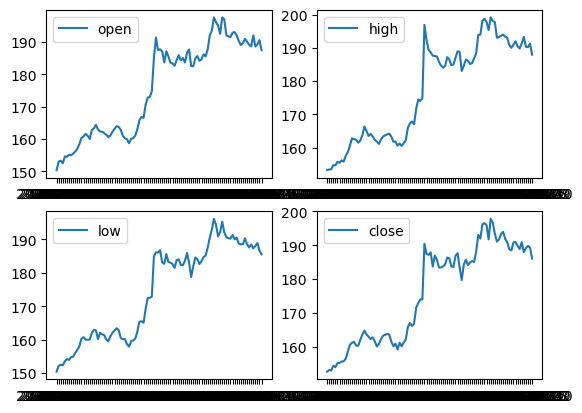

In [33]:
# plot the values
fig, axs = plt.subplots(2,2)
for i in range(2):
    for j in range(2):
        idx = i*2+j
        lab = df.columns[idx]
        axs[i][j].plot(df[lab], label = lab)
        axs[i][j].legend()
        print()

In [38]:
df = df.apply(pd.to_numeric, errors='coerce').T

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 2023-11-15 to 2024-04-10
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    100 non-null    float64
 1   2. high    100 non-null    float64
 2   3. low     100 non-null    float64
 3   4. close   100 non-null    float64
 4   5. volume  100 non-null    float64
dtypes: float64(5)
memory usage: 8.8+ KB
